<a href="https://colab.research.google.com/github/ramanp83/audio_file_preprocessing/blob/main/audio_processing_on_53_files_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1**

# Audio Feature Extraction and K-Means Clustering Workflow

In [ ]:
# Cell 1: Import Libraries and Setup
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Cell 2: Improved Feature Extractor
class FeatureExtractor:
    def __init__(self):
        self.features_cache = {}

    def extract_features(self, audio_path):
        """Extract acoustic features from audio file"""
        try:
            if audio_path in self.features_cache:
                return self.features_cache[audio_path]

            # Ensure we're using the full path
            full_path = os.path.abspath(audio_path)
            if not os.path.exists(full_path):
                raise FileNotFoundError(f"Audio file not found: {full_path}")

            y, sr = librosa.load(full_path, sr=None)

            # Extract features
            mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
            spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

            features = np.concatenate([mfcc, [spectral_centroid, zero_crossing_rate, spectral_rolloff]])
            self.features_cache[audio_path] = features
            return features

        except Exception as e:
            print(f"Error extracting features from {audio_path}: {str(e)}")
            return None

# Cell 3: Improved Clustering Labeler
class ClusteringLabeler:
    def __init__(self, feature_extractor):
        self.feature_extractor = feature_extractor

    def cluster_files(self, audio_dir, n_clusters=2):
        """Use unsupervised clustering for labeling"""
        features = []
        files = []
        failed_files = []

        # Ensure we're using the full path
        audio_dir = os.path.abspath(audio_dir)

        # Process each audio file
        for audio_file in os.listdir(audio_dir):
            if audio_file.endswith('.wav'):
                full_path = os.path.join(audio_dir, audio_file)
                feature_vector = self.feature_extractor.extract_features(full_path)

                if feature_vector is not None:
                    features.append(feature_vector)
                    files.append(audio_file)
                else:
                    failed_files.append(audio_file)

        if failed_files:
            print(f"Failed to process {len(failed_files)} files:")
            for file in failed_files:
                print(f"- {file}")

        if not features:
            return {}

        # Convert to numpy array for clustering
        features_array = np.array(features)

        # Scale features
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features_array)

        # Perform clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(features_scaled)

        # Determine which cluster represents depression
        cluster_means = [np.mean(features_array[clusters == i]) for i in range(n_clusters)]
        depression_cluster = np.argmax(cluster_means)

        # Create labels dictionary
        return dict(zip(files, [1 if c == depression_cluster else 0 for c in clusters]))

# Cell 4: Main Processing
def process_audio_files(audio_dir, output_path):
    """Main function to process audio files and generate labels"""
    print(f"Processing audio files from: {audio_dir}")

    # Initialize components
    feature_extractor = FeatureExtractor()
    clustering_labeler = ClusteringLabeler(feature_extractor)

    # Perform clustering
    print("\nPerforming clustering...")
    labels = clustering_labeler.cluster_files(audio_dir)

    if not labels:
        print("No files were successfully processed")
        return

    # Save labels to CSV
    df = pd.DataFrame({
        'file': list(labels.keys()),
        'label': list(labels.values())
    })

    df.to_csv(output_path, index=False)
    print(f"\nSaved {len(labels)} labels to {output_path}")

    # Print statistics
    print("\nLabel Distribution:")
    print(df['label'].value_counts())
    print("\nSample of Labeled Files:")
    print(df.head())

    return df

# Cell 5: Run the Processing
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Set paths
AUDIO_DIR = "/content/drive/MyDrive/datasset/audio"  # Update this path
OUTPUT_PATH = os.path.join(AUDIO_DIR, "label53.csv")

# Process the files
results = process_audio_files(AUDIO_DIR, OUTPUT_PATH)

Processing audio files from: /content/drive/MyDrive/datasset/audio

Performing clustering...

Saved 52 labels to /content/drive/MyDrive/datasset/audio/label53.csv

Label Distribution:
label
0    30
1    22
Name: count, dtype: int64

Sample of Labeled Files:
            file  label
0  301_AUDIO.wav      0
1  302_AUDIO.wav      1
2  303_AUDIO.wav      0
3  304_AUDIO.wav      0
4  305_AUDIO.wav      0


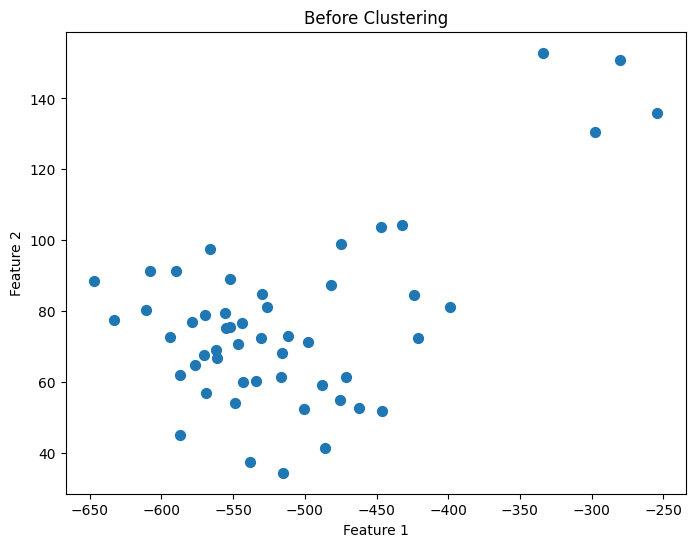

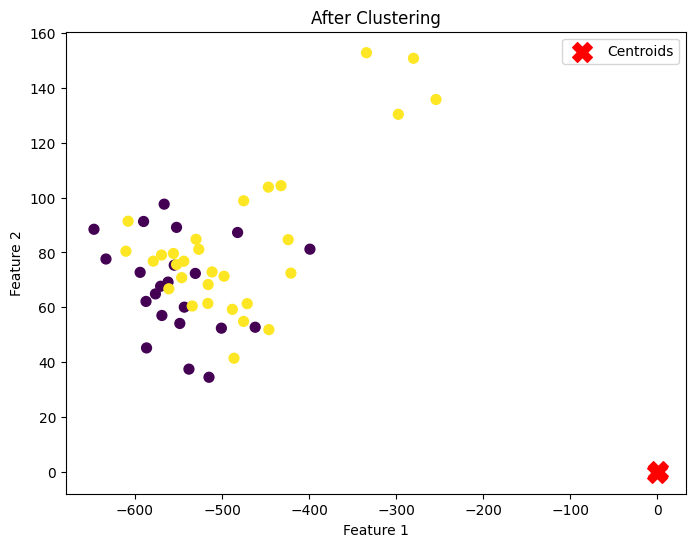

In [ ]:
# @title Visualization of before and after cluster
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Feature Extraction (using your FeatureExtractor class):
# Cell 2: Improved Feature Extractor
class FeatureExtractor:
    def __init__(self):
        self.features_cache = {}

    def extract_features(self, audio_path):
        """Extract acoustic features from audio file"""
        try:
            if audio_path in self.features_cache:
                return self.features_cache[audio_path]

            # Ensure we're using the full path
            full_path = os.path.abspath(audio_path)
            if not os.path.exists(full_path):
                raise FileNotFoundError(f"Audio file not found: {full_path}")

            y, sr = librosa.load(full_path, sr=None)

            # Extract features
            mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
            spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

            features = np.concatenate([mfcc, [spectral_centroid, zero_crossing_rate, spectral_rolloff]])
            self.features_cache[audio_path] = features
            return features

        except Exception as e:
            print(f"Error extracting features from {audio_path}: {str(e)}")
            return None

# 2. Function to load audio files and extract features:
def load_audio_features(audio_dir):
    feature_extractor = FeatureExtractor()
    features = []
    file_names = []

    for filename in os.listdir(audio_dir):
        if filename.endswith(".wav"):
            audio_path = os.path.join(audio_dir, filename)
            feature_vector = feature_extractor.extract_features(audio_path)

            if feature_vector is not None:
                features.append(feature_vector)
                file_names.append(filename)

    return np.array(features), file_names

# 3. Load features from your audio folder:
audio_dir = "/content/drive/MyDrive/datasset/audio"  # Replace with your actual folder path
features_array, file_names = load_audio_features(audio_dir)

# 4. Scale the features:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_array)

# 5. Before Clustering Plot (using first two features for visualization):
plt.figure(figsize=(8, 6))
plt.scatter(features_array[:, 0], features_array[:, 1], s=50)
plt.title("Before Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 6. Apply KMeans Clustering:
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters
clusters = kmeans.fit_predict(features_scaled)  # Fit to the scaled data

# 7. After Clustering Plot (using first two features for visualization):
plt.figure(figsize=(8, 6))
plt.scatter(features_array[:, 0], features_array[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("After Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# **Code for Feature Analysis and Visualization**

#Acoustic Feature Engineering and Random Forest Modeling for Depression Screening

# **2**

Preparing data...

Evaluating model...


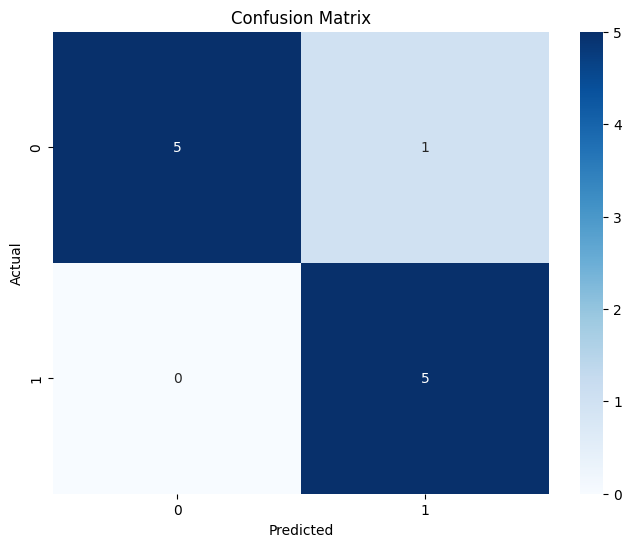

Test Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.83      1.00      0.91         5

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11


Cross-validation Scores: [1.  1.  0.8 0.7 1. ]
Average CV Score: 0.90 (+/- 0.25)

Making prediction for a test file...

Prediction Results for 301_AUDIO.wav:
Predicted Class: Non-depression
Confidence: 0.98

Probabilities:
Non-depression: 0.98
Depression: 0.02


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

class DepressionModelEvaluator:
    def __init__(self, feature_extractor):
        self.feature_extractor = feature_extractor
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)

    def prepare_data(self, audio_dir, labels_file):
        """Prepare features and labels for model training"""
        # Load labels
        labels_df = pd.read_csv(labels_file)

        # Extract features for all files
        features = []
        files = []

        for file in labels_df['file']:
            audio_path = os.path.join(audio_dir, file)
            feature_vector = self.feature_extractor.extract_features(audio_path)
            if feature_vector is not None:
                features.append(feature_vector)
                files.append(file)

        # Create feature array and labels
        X = np.array(features)
        y = labels_df[labels_df['file'].isin(files)]['label'].values

        return X, y, files

    def evaluate_model(self, X, y):
        """Evaluate model using train-test split and cross-validation"""
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Train model
        self.model.fit(X_train, y_train)

        # Make predictions
        y_pred = self.model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Cross-validation
        cv_scores = cross_val_score(self.model, X, y, cv=5)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Print results
        print(f"Test Accuracy: {accuracy:.2f}")
        print("\nClassification Report:")
        print(class_report)
        print("\nCross-validation Scores:", cv_scores)
        print(f"Average CV Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

        return self.model

    def make_prediction(self, audio_file):
        """Make prediction for a single audio file"""
        # Extract features
        features = self.feature_extractor.extract_features(audio_file)
        if features is None:
            return None

        # Reshape for single sample prediction
        features = features.reshape(1, -1)

        # Make prediction
        prediction = self.model.predict(features)
        probabilities = self.model.predict_proba(features)

        return {
            'prediction': prediction[0],
            'probability': max(probabilities[0]),
            'probabilities': {
                'non_depression': probabilities[0][0],
                'depression': probabilities[0][1]
            }
        }

# Example usage
def main():
    # Paths
    AUDIO_DIR = "/content/drive/MyDrive/datasset/audio"
    LABELS_FILE = os.path.join(AUDIO_DIR, "label53.csv")

    # Initialize components
    feature_extractor = FeatureExtractor()
    evaluator = DepressionModelEvaluator(feature_extractor)

    # Prepare data
    print("Preparing data...")
    X, y, files = evaluator.prepare_data(AUDIO_DIR, LABELS_FILE)

    # Evaluate model
    print("\nEvaluating model...")
    model = evaluator.evaluate_model(X, y)

    # Example prediction for a new file
    print("\nMaking prediction for a test file...")
    test_file = os.path.join(AUDIO_DIR, files[0])  # Using first file as example
    result = evaluator.make_prediction(test_file)

    if result:
        print(f"\nPrediction Results for {os.path.basename(test_file)}:")
        print(f"Predicted Class: {'Depression' if result['prediction'] == 1 else 'Non-depression'}")
        print(f"Confidence: {result['probability']:.2f}")
        print("\nProbabilities:")
        print(f"Non-depression: {result['probabilities']['non_depression']:.2f}")
        print(f"Depression: {result['probabilities']['depression']:.2f}")

if __name__ == "__main__":
    main()

# Exploring Acoustic Patterns of Depression: A Visualization-Driven Approach

# **3**


Feature-wise Mean and Standard Deviation by Cluster:
MFCC_1:
  Cluster 0 - Mean: -550.37, Std Dev: 53.91
  Cluster 1 - Mean: -482.94, Std Dev: 90.43
MFCC_2:
  Cluster 0 - Mean: 67.74, Std Dev: 17.19
  Cluster 1 - Mean: 83.35, Std Dev: 27.32
MFCC_3:
  Cluster 0 - Mean: 17.36, Std Dev: 4.10
  Cluster 1 - Mean: 10.28, Std Dev: 6.72
MFCC_4:
  Cluster 0 - Mean: 19.37, Std Dev: 3.86
  Cluster 1 - Mean: 15.41, Std Dev: 5.04
MFCC_5:
  Cluster 0 - Mean: 9.25, Std Dev: 2.29
  Cluster 1 - Mean: 4.63, Std Dev: 3.47
MFCC_6:
  Cluster 0 - Mean: 6.93, Std Dev: 2.38
  Cluster 1 - Mean: 1.57, Std Dev: 3.84
MFCC_7:
  Cluster 0 - Mean: 3.76, Std Dev: 1.76
  Cluster 1 - Mean: -0.97, Std Dev: 2.84
MFCC_8:
  Cluster 0 - Mean: 3.92, Std Dev: 2.76
  Cluster 1 - Mean: 2.82, Std Dev: 3.70
MFCC_9:
  Cluster 0 - Mean: 3.98, Std Dev: 1.95
  Cluster 1 - Mean: 1.57, Std Dev: 2.22
MFCC_10:
  Cluster 0 - Mean: 5.44, Std Dev: 1.45
  Cluster 1 - Mean: 1.98, Std Dev: 3.24
MFCC_11:
  Cluster 0 - Mean: 3.19, Std Dev: 1.71

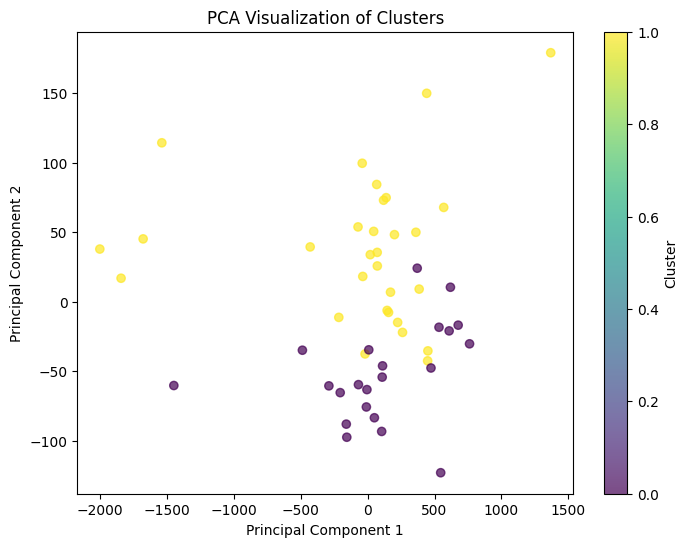

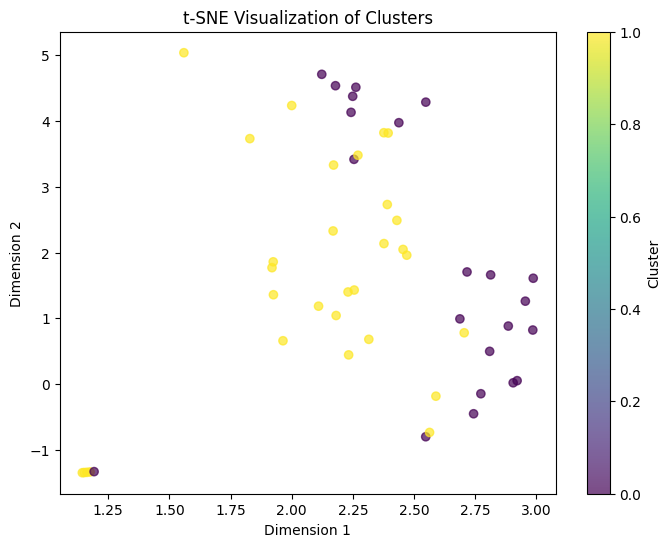

In [ ]:
import os
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Feature extraction class
class FeatureExtractor:
    def __init__(self):
        self.features_cache = {}

    def extract_features(self, audio_path):
        """Extract acoustic features from audio file."""
        try:
            if audio_path in self.features_cache:
                return self.features_cache[audio_path]

            full_path = os.path.abspath(audio_path)
            if not os.path.exists(full_path):
                raise FileNotFoundError(f"Audio file not found: {full_path}")

            y, sr = librosa.load(full_path, sr=None)

            # Extract features
            mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
            spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

            features = np.concatenate([mfcc, [spectral_centroid, zero_crossing_rate, spectral_rolloff]])
            self.features_cache[audio_path] = features
            return features

        except Exception as e:
            print(f"Error extracting features from {audio_path}: {str(e)}")
            return None

# Clustering and labeling class
class ClusteringLabeler:
    def __init__(self, feature_extractor):
        self.feature_extractor = feature_extractor

    def cluster_files(self, audio_dir, n_clusters=2):
        """Use unsupervised clustering for labeling and return features."""
        features = []
        files = []
        failed_files = []

        audio_dir = os.path.abspath(audio_dir)

        for audio_file in os.listdir(audio_dir):
            if audio_file.endswith('.wav'):
                full_path = os.path.join(audio_dir, audio_file)
                feature_vector = self.feature_extractor.extract_features(full_path)

                if feature_vector is not None:
                    features.append(feature_vector)
                    files.append(audio_file)
                else:
                    failed_files.append(audio_file)

        if failed_files:
            print(f"Failed to process {len(failed_files)} files:")
            for file in failed_files:
                print(f"- {file}")

        if not features:
            return {}, None, None

        features_array = np.array(features)
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features_array)

        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(features_scaled)

        cluster_means = [np.mean(features_array[clusters == i]) for i in range(n_clusters)]
        depression_cluster = np.argmax(cluster_means)

        labels = dict(zip(files, [1 if c == depression_cluster else 0 for c in clusters]))
        return labels, features_array, clusters

# Feature analysis and visualization function
def analyze_and_visualize_features(features, clusters, feature_names):
    """Analyze and visualize feature contributions to clustering."""
    features_array = np.array(features)

    # Feature-wise distribution analysis
    print("\nFeature-wise Mean and Standard Deviation by Cluster:")
    for i, feature_name in enumerate(feature_names):
        cluster_means = [np.mean(features_array[clusters == c, i]) for c in np.unique(clusters)]
        cluster_stds = [np.std(features_array[clusters == c, i]) for c in np.unique(clusters)]
        print(f"{feature_name}:")
        for cluster, mean, std in zip(np.unique(clusters), cluster_means, cluster_stds):
            print(f"  Cluster {cluster} - Mean: {mean:.2f}, Std Dev: {std:.2f}")

    # PCA for dimensionality reduction to 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features_array)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(label="Cluster")
    plt.title("PCA Visualization of Clusters")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    # t-SNE for non-linear dimensionality reduction
    perplexity_value = min(30, features_array.shape[0] - 1)
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_result = tsne.fit_transform(features_array)

    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(label="Cluster")
    plt.title("t-SNE Visualization of Clusters")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Main execution
if __name__ == "__main__":
    AUDIO_DIR = "/content/drive/MyDrive/datasset/audio"  # Replace with the directory containing audio files

    # Create an instance of FeatureExtractor
    feature_extractor = FeatureExtractor()

    # Create an instance of ClusteringLabeler
    clustering_labeler = ClusteringLabeler(feature_extractor)

    # Run the process and visualize features
    labels, features, clusters = clustering_labeler.cluster_files(AUDIO_DIR)
    if features is not None:
        feature_names = [f"MFCC_{i+1}" for i in range(13)] + ["Spectral_Centroid", "Zero_Crossing_Rate", "Spectral_Rolloff"]
        analyze_and_visualize_features(features, clusters, feature_names)


# Clustering and Visualizing the Sounds of Depression


# **4**


Feature-wise Mean and Standard Deviation by Cluster:
MFCC_1:
  Cluster 0 - Mean: -550.37, Std Dev: 53.91
  Cluster 1 - Mean: -482.94, Std Dev: 90.43
MFCC_2:
  Cluster 0 - Mean: 67.74, Std Dev: 17.19
  Cluster 1 - Mean: 83.35, Std Dev: 27.32
MFCC_3:
  Cluster 0 - Mean: 17.36, Std Dev: 4.10
  Cluster 1 - Mean: 10.28, Std Dev: 6.72
MFCC_4:
  Cluster 0 - Mean: 19.37, Std Dev: 3.86
  Cluster 1 - Mean: 15.41, Std Dev: 5.04
MFCC_5:
  Cluster 0 - Mean: 9.25, Std Dev: 2.29
  Cluster 1 - Mean: 4.63, Std Dev: 3.47
MFCC_6:
  Cluster 0 - Mean: 6.93, Std Dev: 2.38
  Cluster 1 - Mean: 1.57, Std Dev: 3.84
MFCC_7:
  Cluster 0 - Mean: 3.76, Std Dev: 1.76
  Cluster 1 - Mean: -0.97, Std Dev: 2.84
MFCC_8:
  Cluster 0 - Mean: 3.92, Std Dev: 2.76
  Cluster 1 - Mean: 2.82, Std Dev: 3.70
MFCC_9:
  Cluster 0 - Mean: 3.98, Std Dev: 1.95
  Cluster 1 - Mean: 1.57, Std Dev: 2.22
MFCC_10:
  Cluster 0 - Mean: 5.44, Std Dev: 1.45
  Cluster 1 - Mean: 1.98, Std Dev: 3.24
MFCC_11:
  Cluster 0 - Mean: 3.19, Std Dev: 1.71

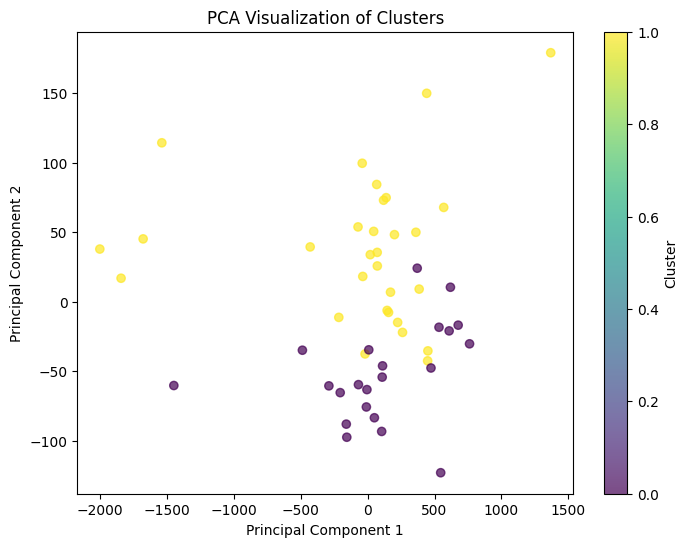

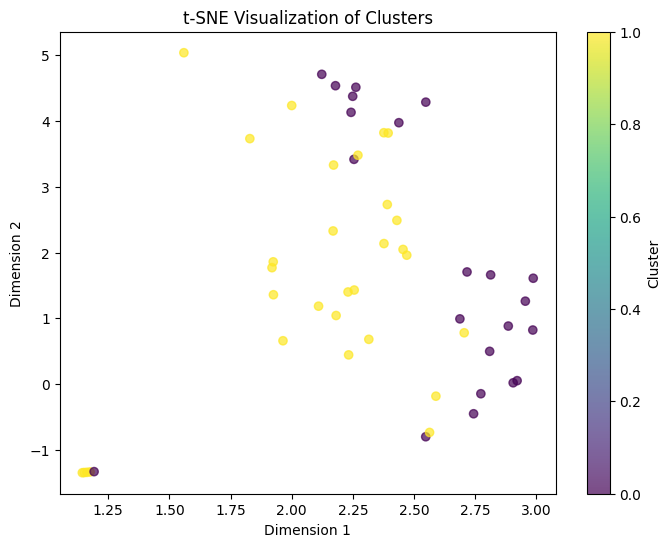

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Cell 6: Analyze and Visualize Features
def analyze_and_visualize_features(features, clusters, feature_names):
    """Analyze and visualize feature contributions to clustering."""

    # Convert features to a numpy array if not already
    features_array = np.array(features)

    # Feature-wise distribution analysis
    print("\nFeature-wise Mean and Standard Deviation by Cluster:")
    for i, feature_name in enumerate(feature_names):
        cluster_means = [np.mean(features_array[clusters == c, i]) for c in np.unique(clusters)]
        cluster_stds = [np.std(features_array[clusters == c, i]) for c in np.unique(clusters)]
        print(f"{feature_name}:")
        for cluster, mean, std in zip(np.unique(clusters), cluster_means, cluster_stds):
            print(f"  Cluster {cluster} - Mean: {mean:.2f}, Std Dev: {std:.2f}")

    # PCA for dimensionality reduction to 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features_array)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(label="Cluster")
    plt.title("PCA Visualization of Clusters")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    # t-SNE for non-linear dimensionality reduction
    tsne = TSNE(n_components=3, perplexity=30, random_state=42)

    # Set perplexity to be less than the number of samples (14 in this case)
    # t-SNE Visualization (Updated for 3D)
    perplexity_value = min(30, features_array.shape[0] - 1)
    tsne = TSNE(n_components=3, perplexity=perplexity_value, random_state=42)  # n_components=3 for 3D
    tsne_result = tsne.fit_transform(features_array)

    fig = plt.figure(figsize=(10, 8))  # Larger figure size for 3D
    ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

    scatter = ax.scatter(tsne_result[:, 0], tsne_result[:, 1], tsne_result[:, 2],
                        c=clusters, cmap='viridis', alpha=0.7, edgecolors='k', s=50)

    ax.set_xlabel("t-SNE Dimension 1")
    ax.set_ylabel("t-SNE Dimension 2")
    ax.set_zlabel("t-SNE Dimension 3")  # Add z-axis label
    plt.title("t-SNE Visualization of Clusters (3D)")

    # Add a colorbar for cluster identification
    fig.colorbar(scatter, label="Cluster")

    plt.show()


# Update the Clustering Labeler to return features and clusters
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

class FeatureExtractor:
    def __init__(self):
        self.features_cache = {}

    def extract_features(self, audio_path):
        """Extract acoustic features from audio file."""
        try:
            if audio_path in self.features_cache:
                return self.features_cache[audio_path]

            full_path = os.path.abspath(audio_path)
            if not os.path.exists(full_path):
                raise FileNotFoundError(f"Audio file not found: {full_path}")

            y, sr = librosa.load(full_path, sr=None)

            # Extract features
            mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)
            spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
            zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y))
            spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

            features = np.concatenate([mfcc, [spectral_centroid, zero_crossing_rate, spectral_rolloff]])
            self.features_cache[audio_path] = features
            return features

        except Exception as e:
            print(f"Error extracting features from {audio_path}: {str(e)}")
            return None

class ClusteringLabeler:
    def __init__(self, feature_extractor):
        self.feature_extractor = feature_extractor

    def cluster_files(self, audio_dir, n_clusters=2):
        """Use unsupervised clustering for labeling and return features."""
        features = []
        files = []
        failed_files = []

        audio_dir = os.path.abspath(audio_dir)

        for audio_file in os.listdir(audio_dir):
            if audio_file.endswith('.wav'):
                full_path = os.path.join(audio_dir, audio_file)
                feature_vector = self.feature_extractor.extract_features(full_path)

                if feature_vector is not None:
                    features.append(feature_vector)
                    files.append(audio_file)
                else:
                    failed_files.append(audio_file)

        if failed_files:
            print(f"Failed to process {len(failed_files)} files:")
            for file in failed_files:
                print(f"- {file}")

        if not features:
            return {}, None, None

        features_array = np.array(features)
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features_array)

        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(features_scaled)

        cluster_means = [np.mean(features_array[clusters == i]) for i in range(n_clusters)]
        depression_cluster = np.argmax(cluster_means)

        labels = dict(zip(files, [1 if c == depression_cluster else 0 for c in clusters]))
        return labels, features_array, clusters # Return features and clusters

# Feature analysis and visualization function
def analyze_and_visualize_features(features, clusters, feature_names):
    """Analyze and visualize feature contributions to clustering."""
    features_array = np.array(features)

    # Feature-wise distribution analysis
    print("\nFeature-wise Mean and Standard Deviation by Cluster:")
    for i, feature_name in enumerate(feature_names):
        cluster_means = [np.mean(features_array[clusters == c, i]) for c in np.unique(clusters)]
        cluster_stds = [np.std(features_array[clusters == c, i]) for c in np.unique(clusters)]
        print(f"{feature_name}:")
        for cluster, mean, std in zip(np.unique(clusters), cluster_means, cluster_stds):
            print(f"  Cluster {cluster} - Mean: {mean:.2f}, Std Dev: {std:.2f}")

    # PCA for dimensionality reduction to 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features_array)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(label="Cluster")
    plt.title("PCA Visualization of Clusters")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    # t-SNE for non-linear dimensionality reduction
    perplexity_value = min(30, features_array.shape[0] - 1)
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_result = tsne.fit_transform(features_array)

    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(label="Cluster")
    plt.title("t-SNE Visualization of Clusters")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Create an instance of FeatureExtractor
feature_extractor = FeatureExtractor()

# Create an instance of ClusteringLabeler
clustering_labeler = ClusteringLabeler(feature_extractor)

# Run the process and visualize features
labels, features, clusters = clustering_labeler.cluster_files(AUDIO_DIR)  # Assuming AUDIO_DIR is defined
if features is not None:
    feature_names = [f"MFCC_{i+1}" for i in range(13)] + ["Spectral_Centroid", "Zero_Crossing_Rate", "Spectral_Rolloff"]
    analyze_and_visualize_features(features, clusters, feature_names)

**Interactive visualization**

# Acoustic Patterns of Depression: An Interactive Visualization

# **5**


Feature-wise Mean and Standard Deviation by Cluster:
MFCC_1:
  Cluster 0 - Mean: -550.37, Std Dev: 53.91
  Cluster 1 - Mean: -482.94, Std Dev: 90.43
MFCC_2:
  Cluster 0 - Mean: 67.74, Std Dev: 17.19
  Cluster 1 - Mean: 83.35, Std Dev: 27.32
MFCC_3:
  Cluster 0 - Mean: 17.36, Std Dev: 4.10
  Cluster 1 - Mean: 10.28, Std Dev: 6.72
MFCC_4:
  Cluster 0 - Mean: 19.37, Std Dev: 3.86
  Cluster 1 - Mean: 15.41, Std Dev: 5.04
MFCC_5:
  Cluster 0 - Mean: 9.25, Std Dev: 2.29
  Cluster 1 - Mean: 4.63, Std Dev: 3.47
MFCC_6:
  Cluster 0 - Mean: 6.93, Std Dev: 2.38
  Cluster 1 - Mean: 1.57, Std Dev: 3.84
MFCC_7:
  Cluster 0 - Mean: 3.76, Std Dev: 1.76
  Cluster 1 - Mean: -0.97, Std Dev: 2.84
MFCC_8:
  Cluster 0 - Mean: 3.92, Std Dev: 2.76
  Cluster 1 - Mean: 2.82, Std Dev: 3.70
MFCC_9:
  Cluster 0 - Mean: 3.98, Std Dev: 1.95
  Cluster 1 - Mean: 1.57, Std Dev: 2.22
MFCC_10:
  Cluster 0 - Mean: 5.44, Std Dev: 1.45
  Cluster 1 - Mean: 1.98, Std Dev: 3.24
MFCC_11:
  Cluster 0 - Mean: 3.19, Std Dev: 1.71

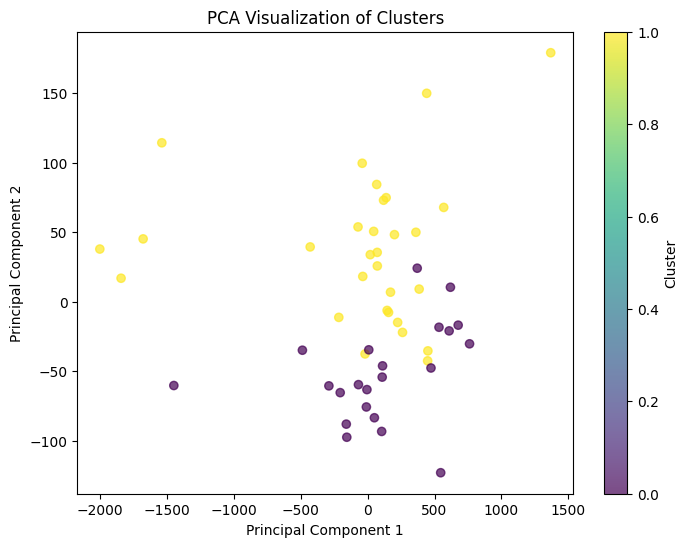

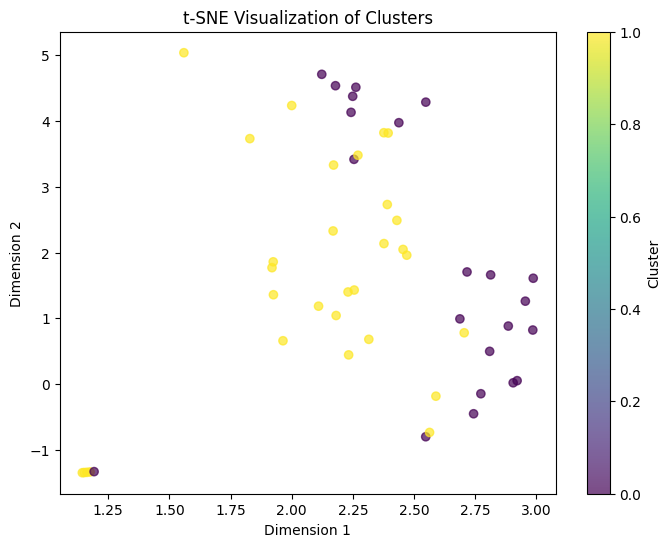

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Cell 6: Analyze and Visualize Features
def analyze_and_visualize_features(features, clusters, feature_names):
    """Analyze and visualize feature contributions to clustering."""

    # Convert features to a numpy array if not already
    features_array = np.array(features)

    # Feature-wise distribution analysis
    print("\nFeature-wise Mean and Standard Deviation by Cluster:")
    for i, feature_name in enumerate(feature_names):
        cluster_means = [np.mean(features_array[clusters == c, i]) for c in np.unique(clusters)]
        cluster_stds = [np.std(features_array[clusters == c, i]) for c in np.unique(clusters)]
        print(f"{feature_name}:")
        for cluster, mean, std in zip(np.unique(clusters), cluster_means, cluster_stds):
            print(f"  Cluster {cluster} - Mean: {mean:.2f}, Std Dev: {std:.2f}")

    # Interactive PCA Visualization with Plotly
    pca = PCA(n_components=3)  # Reduce to 3 dimensions for 3D scatter
    pca_result = pca.fit_transform(features_array)

    # Create a DataFrame for Plotly Express
    df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])
    df['Cluster'] = clusters
    for i, feature_name in enumerate(feature_names):
        df[feature_name] = features_array[:, i]

    fig_pca = px.scatter_3d(
        df,
        x="PC1",
        y="PC2",
        z="PC3",
        color="Cluster",
        hover_data=feature_names,  # Pass feature names directly
        title="Interactive PCA Visualization of Clusters",
        color_continuous_scale=px.colors.qualitative.Plotly
    )
    fig_pca.show()

    # Interactive t-SNE Visualization with Plotly
    perplexity_value = min(30, features_array.shape[0] - 1)
    tsne = TSNE(n_components=3, perplexity=perplexity_value, random_state=42)
    tsne_result = tsne.fit_transform(features_array)

    # Create a DataFrame for Plotly Express (t-SNE)
    df_tsne = pd.DataFrame(tsne_result, columns=["t-SNE Dim 1", "t-SNE Dim 2", "t-SNE Dim 3"])
    df_tsne['Cluster'] = clusters
    for i, feature_name in enumerate(feature_names):
        df_tsne[feature_name] = features_array[:, i]  # Add features to DataFrame

    fig_tsne = px.scatter_3d(
        df_tsne,
        x="t-SNE Dim 1",
        y="t-SNE Dim 2",
        z="t-SNE Dim 3",
        color="Cluster",
        hover_data=feature_names,  # Pass feature names for hover data
        title="Interactive t-SNE Visualization of Clusters",
        color_continuous_scale=px.colors.qualitative.Plotly
    )
    fig_tsne.show()

# Update the Clustering Labeler to return features and clusters
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# ... (Your FeatureExtractor class remains the same) ...

class ClusteringLabeler:
    def __init__(self, feature_extractor):
        self.feature_extractor = feature_extractor

    def cluster_files(self, audio_dir, n_clusters=2):
        """Use unsupervised clustering for labeling and return features."""
        features = []
        files = []
        failed_files = []

        audio_dir = os.path.abspath(audio_dir)

        for audio_file in os.listdir(audio_dir):
            if audio_file.endswith('.wav'):
                full_path = os.path.join(audio_dir, audio_file)
                feature_vector = self.feature_extractor.extract_features(full_path)

                if feature_vector is not None:
                    features.append(feature_vector)
                    files.append(audio_file)
                else:
                    failed_files.append(audio_file)

        if failed_files:
            print(f"Failed to process {len(failed_files)} files:")
            for file in failed_files:
                print(f"- {file}")

        if not features:
            return {}, None, None

        features_array = np.array(features)
        scaler = StandardScaler()
        features_scaled = scaler.fit_transform(features_array)

        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = kmeans.fit_predict(features_scaled)

        cluster_means = [np.mean(features_array[clusters == i]) for i in range(n_clusters)]
        depression_cluster = np.argmax(cluster_means)

        labels = dict(zip(files, [1 if c == depression_cluster else 0 for c in clusters]))
        return labels, features_array, clusters # Return features and clusters

def analyze_and_visualize_features(features, clusters, feature_names):
    """Analyze and visualize feature contributions to clustering."""
    features_array = np.array(features)

    # Feature-wise distribution analysis
    print("\nFeature-wise Mean and Standard Deviation by Cluster:")
    for i, feature_name in enumerate(feature_names):
        cluster_means = [np.mean(features_array[clusters == c, i]) for c in np.unique(clusters)]
        cluster_stds = [np.std(features_array[clusters == c, i]) for c in np.unique(clusters)]
        print(f"{feature_name}:")
        for cluster, mean, std in zip(np.unique(clusters), cluster_means, cluster_stds):
            print(f"  Cluster {cluster} - Mean: {mean:.2f}, Std Dev: {std:.2f}")

    # PCA for dimensionality reduction to 2D
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(features_array)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(label="Cluster")
    plt.title("PCA Visualization of Clusters")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.show()

    # t-SNE for non-linear dimensionality reduction
    perplexity_value = min(30, features_array.shape[0] - 1)
    tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
    tsne_result = tsne.fit_transform(features_array)

    plt.figure(figsize=(8, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.colorbar(label="Cluster")
    plt.title("t-SNE Visualization of Clusters")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Create an instance of FeatureExtractor
feature_extractor = FeatureExtractor()

# Create an instance of ClusteringLabeler
clustering_labeler = ClusteringLabeler(feature_extractor)

# Run the process and visualize features
labels, features, clusters = clustering_labeler.cluster_files(AUDIO_DIR)  # Assuming AUDIO_DIR is defined
if features is not None:
    feature_names = [f"MFCC_{i+1}" for i in range(13)] + ["Spectral_Centroid", "Zero_Crossing_Rate", "Spectral_Rolloff"]
    analyze_and_visualize_features(features, clusters, feature_names)

The first plot uses t-SNE to visualize high-dimensional data in 2D, helping identify clusters, while the second one utilizes PCA for the same purpose

# Implement a validation script for assessing clustering quality`

**approaches**:

**1. Silhouette Score:** Measures how similar an object is to its own cluster compared to other clusters. A higher score indicates better-defined clusters.

**2. Calinski-Harabasz Index:** Evaluates the ratio of the sum of between-clusters dispersion to within-cluster dispersion. Higher values indicate better separation.

**3. Davies-Bouldin Index:** Measures the average similarity ratio of each cluster with its most similar cluster. Lower values indicate better clustering.



# **6**

In [ ]:
# Import additional libraries for validation
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

def validate_clustering(features_scaled, clusters):
    """
    Validate clustering quality using various metrics.

    Args:
        features_scaled (np.array): Scaled feature array used for clustering.
        clusters (np.array): Cluster labels assigned to each sample.

    Returns:
        dict: Validation scores for Silhouette, Calinski-Harabasz, and Davies-Bouldin indices.
    """
    validation_scores = {}

    try:
        # Silhouette Score: Higher is better, range [-1, 1]
        silhouette_avg = silhouette_score(features_scaled, clusters)
        validation_scores["Silhouette Score"] = silhouette_avg

        # Calinski-Harabasz Index: Higher is better
        calinski_harabasz = calinski_harabasz_score(features_scaled, clusters)
        validation_scores["Calinski-Harabasz Index"] = calinski_harabasz

        # Davies-Bouldin Index: Lower is better
        davies_bouldin = davies_bouldin_score(features_scaled, clusters)
        validation_scores["Davies-Bouldin Index"] = davies_bouldin

        print("\nValidation Scores:")
        for metric, score in validation_scores.items():
            print(f"{metric}: {score:.4f}")

    except Exception as e:
        print(f"Error during clustering validation: {str(e)}")

    return validation_scores

# Integrate into the existing workflow
def cluster_and_validate(audio_dir, n_clusters=2):
    """Clusters audio files and validates the clustering quality."""
    print(f"\nClustering and validating audio files in: {audio_dir}")

    feature_extractor = FeatureExtractor()
    clustering_labeler = ClusteringLabeler(feature_extractor)

    # Cluster the files and unpack the returned tuple
    labels, features_array, clusters = clustering_labeler.cluster_files(audio_dir, n_clusters=n_clusters)

    if not labels:
        print("No files were successfully processed for clustering.")
        return

    # Extract features for validation
    files = list(labels.keys())
    cluster_labels = list(labels.values())
    features = [feature_extractor.extract_features(os.path.join(audio_dir, f)) for f in files]
    features_array = np.array(features)

    # Scale features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_array)

    # Validate clusters
    validation_scores = validate_clustering(features_scaled, np.array(cluster_labels))
    return validation_scores

# Run validation
validation_results = cluster_and_validate(AUDIO_DIR)



Clustering and validating audio files in: /content/drive/MyDrive/datasset/audio

Validation Scores:
Silhouette Score: 0.1919
Calinski-Harabasz Index: 15.3133
Davies-Bouldin Index: 1.5998


# **7**

Shape of features: (52, 16)
Visualizing clusters in 2D using PCA...


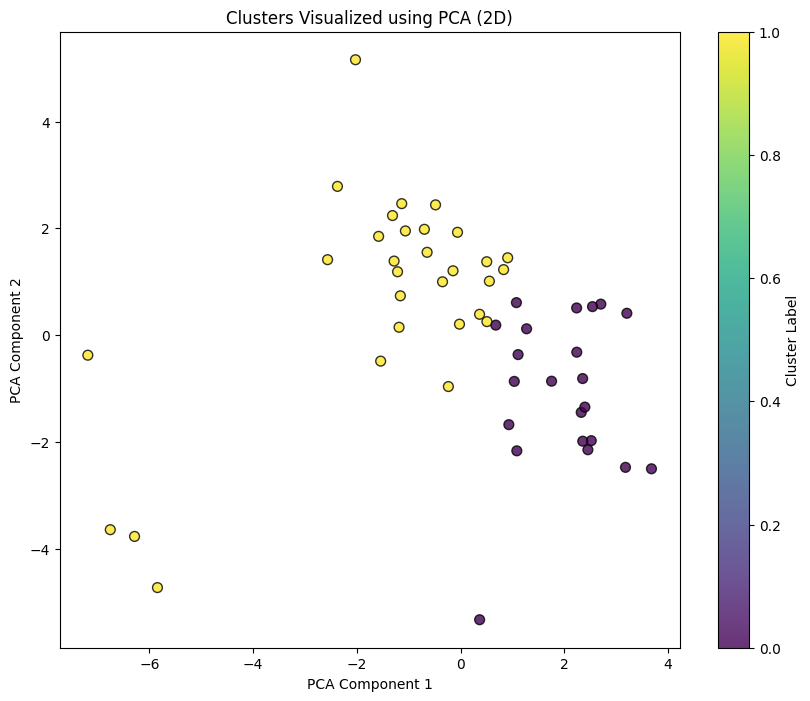

Visualizing clusters in 3D using PCA...


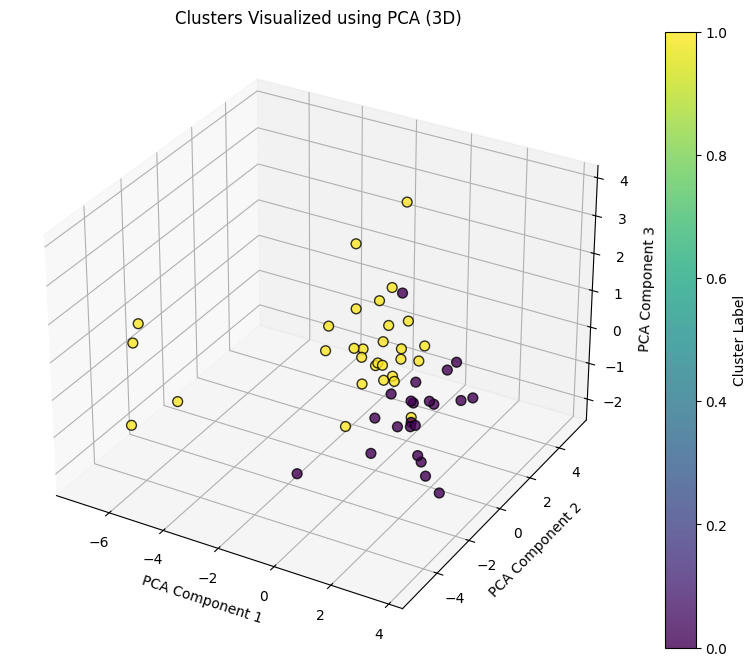

Visualizing clusters in 2D using t-SNE...


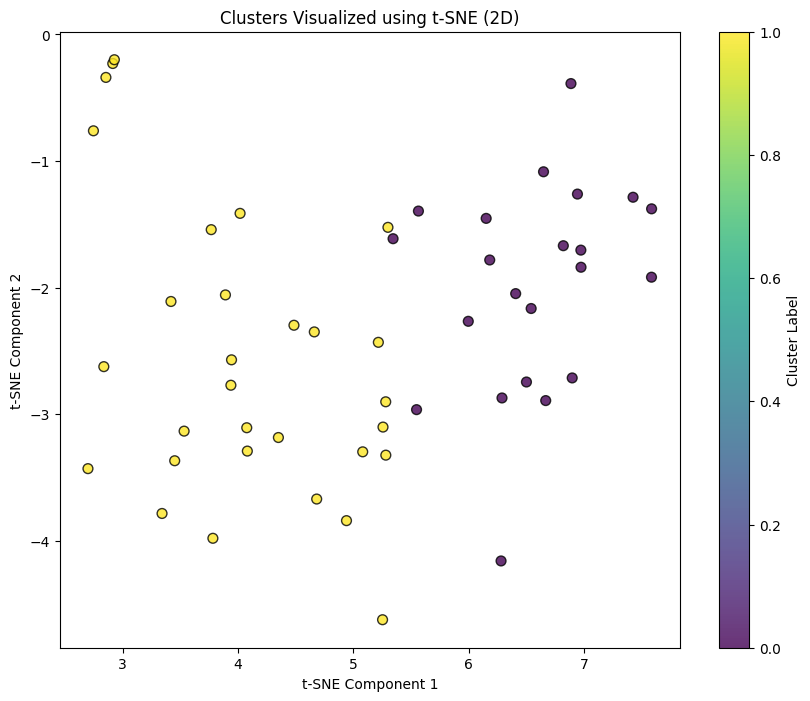

Visualizing clusters in 3D using t-SNE...


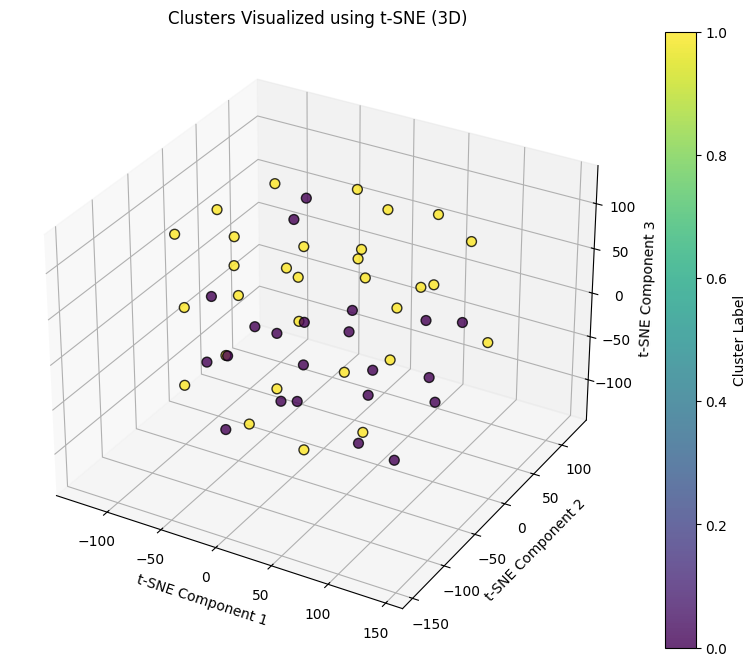

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # For 3D plots

def visualize_clusters(features, labels, method='PCA', n_components=2):
    """
    Visualize clusters using PCA or t-SNE.
    :param features: Numpy array of feature vectors.
    :param labels: Cluster labels.
    :param method: Dimensionality reduction method ('PCA' or 't-SNE').
    :param n_components: Number of dimensions to reduce to (2 or 3).
    """
    try:
        # Choose dimensionality reduction method
        if method == 'PCA':
            reducer = PCA(n_components=n_components)
        elif method == 't-SNE':
            reducer = TSNE(n_components=n_components, random_state=42)
        else:
            raise ValueError("Unsupported method. Use 'PCA' or 't-SNE'.")

        # Perform dimensionality reduction
        reduced_features = reducer.fit_transform(features)

        # Create the plot
        fig = plt.figure(figsize=(10, 8))

        if n_components == 2:
            # 2D scatter plot
            plt.scatter(
                reduced_features[:, 0], reduced_features[:, 1],
                c=labels, cmap='viridis', s=50, alpha=0.8, edgecolors='k'
            )
            plt.xlabel(f'{method} Component 1')
            plt.ylabel(f'{method} Component 2')
            plt.title(f'Clusters Visualized using {method} (2D)')
            plt.colorbar(label='Cluster Label')
            plt.show()

        elif n_components == 3:
            # 3D scatter plot
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(
                reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2],
                c=labels, cmap='viridis', s=50, alpha=0.8, edgecolors='k'
            )
            ax.set_xlabel(f'{method} Component 1')
            ax.set_ylabel(f'{method} Component 2')
            ax.set_zlabel(f'{method} Component 3')
            plt.title(f'Clusters Visualized using {method} (3D)')
            fig.colorbar(scatter, label='Cluster Label')
            plt.show()

    except Exception as e:
        print(f"Error during visualization: {str(e)}")

# Assuming `features` is populated with feature vectors
if len(features) == 0:
    raise ValueError("No features were extracted. Ensure audio files are accessible and the extraction process is working.")

features = np.array(features)
print(f"Shape of features: {features.shape}")

# Check dimensions
if len(features.shape) != 2:
    raise ValueError(f"Expected 2D array for features, but got shape {features.shape}. Ensure the data format is correct.")

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Now you can visualize the clusters
print("Visualizing clusters in 2D using PCA...")
visualize_clusters(features_scaled, clusters, method='PCA', n_components=2)
print("Visualizing clusters in 3D using PCA...")
visualize_clusters(features_scaled, clusters, method='PCA', n_components=3)

print("Visualizing clusters in 2D using t-SNE...")
visualize_clusters(features_scaled, clusters, method='t-SNE', n_components=2)

print("Visualizing clusters in 3D using t-SNE...")
visualize_clusters(features_scaled, clusters, method='t-SNE', n_components=3)


# Calculate Imblance rate

# **8**

In [ ]:
import pandas as pd
from collections import Counter

def calculate_imbalance_from_csv(file_path, label_column):
    """
    Calculate class imbalance rate from a labels.csv file.

    Args:
    file_path (str): Path to the CSV file containing class labels.
    label_column (str): Name of the column in the CSV containing class labels.

    Returns:
    imbalance_rate (float): Imbalance rate of the dataset.
    class_counts (dict): Distribution of samples across classes.
    """
    # Load the CSV file
    df = pd.read_csv(file_path)

    # Count occurrences of each class
    class_counts = Counter(df[label_column])
    print("Class Distribution:", dict(class_counts))

    # Identify majority and minority class sizes
    majority_class_size = max(class_counts.values())
    minority_class_size = min(class_counts.values())

    # Calculate imbalance rate
    imbalance_rate = majority_class_size / minority_class_size
    return imbalance_rate, class_counts

# Example Usage
# Provide the path to your labels.csv file and the column name containing the labels
file_path = "/content/drive/MyDrive/datasset/audio/label53.csv"  # Replace with the actual path
label_column = "label"  # Replace with the actual column name

imbalance_rate, class_counts = calculate_imbalance_from_csv(file_path, label_column)

print("\nImbalance Rate:", imbalance_rate)


Class Distribution: {0: 30, 1: 22}

Imbalance Rate: 1.3636363636363635


1. librosa.load:
* Loads the audio file and returns the audio time series (audio) and its original sampling rate (sr).
* "sr=None" ensures that the file is loaded at its native sampling rate.

2. librosa.resample:
* Resamples the audio from its original sampling rate (orig_sr) to a new target sampling rate (target_sr).

3. soundfile.write:
* Saves the resampled audio to the specified file (output_path) with the target sampling rate.

**Parameters:**
* file_path: Path to the input audio file.
* output_path: Path where the processed audio will be saved.
* target_sr: Desired sampling rate for the output audio. Defaults to 16,000 Hz.

# Calculate accuracy rate

# **9**

In [ ]:
# Install required libraries
# !pip install librosa numpy pandas scikit-learn

# Import libraries
import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

def extract_audio_features(audio_path, n_mfcc=13):
    """
    Extract features from a single audio file

    Parameters:
    -----------
    audio_path : str
        Path to the audio file
    n_mfcc : int, optional
        Number of MFCCs to extract

    Returns:
    --------
    dict
        Extracted audio features
    """
    try:
        # Load audio file
        y, sr = librosa.load(audio_path, sr=16000)

        # Feature extraction
        features = {
            # Fundamental Frequency (F0)
            'f0': np.mean(librosa.yin(y,
                                       fmin=librosa.note_to_hz('C2'),
                                       fmax=librosa.note_to_hz('C7'))),

            # MFCCs
            'mfccs': np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)),

            # Zero Crossing Rate
            'zcr': np.mean(librosa.feature.zero_crossing_rate(y)[0]),

            # Spectral Centroid
            'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0]),

            # RMS Energy
            'rms_energy': np.mean(librosa.feature.rms(y=y)[0])
        }

        return features
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None

def extract_features_from_folder(audio_folder_path):
    """
    Extract features from all audio files in a folder

    Parameters:
    -----------
    audio_folder_path : str
        Path to folder containing audio files

    Returns:
    --------
    tuple
        Features DataFrame and list of processed file paths
    """
    # List all WAV files
    audio_files = [
        os.path.join(audio_folder_path, f)
        for f in os.listdir(audio_folder_path)
        if f.endswith('.wav')
    ]

    # Extract features
    feature_list = []
    processed_files = []

    for audio_path in audio_files:
        features = extract_audio_features(audio_path)

        if features is not None:
            feature_list.append(list(features.values()))
            processed_files.append(audio_path)

    # Convert to DataFrame
    feature_columns = ['f0', 'mfccs', 'zcr', 'spectral_centroid', 'rms_energy']
    features_df = pd.DataFrame(feature_list, columns=feature_columns)

    return features_df, processed_files

def train_mental_health_model(features, labels):
    """
    Train a Random Forest Classifier

    Parameters:
    -----------
    features : pandas.DataFrame
        Extracted audio features
    labels : list
        Binary labels

    Returns:
    --------
    tuple
        Trained model, classification report
    """
    # Preprocess features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, labels,
        test_size=0.2,
        random_state=42,
        stratify=labels
    )

    # Train Random Forest Classifier
    clf = RandomForestClassifier(
        n_estimators=100,
        random_state=42
    )
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)

    # Generate classification report
    report = classification_report(y_test, y_pred)

    return clf, report

def get_labels_from_csv(processed_files, labels_file):
    """Generate labels from a CSV file."""
    try:
        labels_df = pd.read_csv(labels_file)
        filename_to_label = dict(zip(labels_df['file'], labels_df['label']))
        labels = [filename_to_label.get(os.path.basename(f), -1) for f in processed_files]
        return labels
    except FileNotFoundError:
        print(f"Error: Labels file not found at {labels_file}")
        return None  # Or handle the error differently

# Main part of the code
# Mount Google Drive (if using)
# from google.colab import drive
# drive.mount('/content/drive')

# Set paths
audio_folder_path = '/content/drive/MyDrive/datasset/audio'
labels_file_path = '/content/drive/MyDrive/datasset/audio/label53.csv'  # Path to your labels.csv

# Extract features
features_df, processed_files = extract_features_from_folder(audio_folder_path)

# Generate labels from CSV
labels = get_labels_from_csv(processed_files, labels_file_path)

# Check if labels were loaded successfully
if labels is not None:
    # Train model
    model, classification_report_result = train_mental_health_model(features_df, labels)

    # Print results
    print("Processed Files:", len(processed_files))
    print("\nClassification Report:")
    print(classification_report_result)
else:
    print("Could not load labels. Model training skipped.")



Processed Files: 52

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         6
           1       1.00      0.40      0.57         5

    accuracy                           0.73        11
   macro avg       0.83      0.70      0.69        11
weighted avg       0.82      0.73      0.70        11



# **10**

In [ ]:
def print_data_stats(features_df, labels):
    """
    Print basic statistics about the dataset
    """
    print("Total Samples:", len(labels))
    print("Label Distribution:")
    print(pd.Series(labels).value_counts(normalize=True))

    print("\nFeature Statistics:")
    print(features_df.describe())

# Call this after feature extraction
print_data_stats(features_df, labels)

Total Samples: 52
Label Distribution:
0    0.576923
1    0.423077
Name: proportion, dtype: float64

Feature Statistics:
               f0      mfccs        zcr  spectral_centroid  rms_energy
count   52.000000  52.000000  52.000000          52.000000   52.000000
mean   464.301156 -29.089083   0.068008        1427.469942    0.008135
std    131.751476   6.960346   0.012976         227.456239    0.011822
min    169.238505 -37.105423   0.040848         758.817685    0.001098
25%    412.831046 -33.420167   0.058582        1374.644067    0.003181
50%    455.223701 -30.860748   0.069981        1483.477126    0.004051
75%    524.494974 -28.137666   0.077130        1556.540861    0.007144
max    839.007771  -8.619588   0.099237        1912.867520    0.065470


# **Advanced Audio Analysis and Model Evaluation**

# **11**

In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

# Machine Learning Imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)
def extract_enhanced_features(audio_files, n_mfcc=13):
    """
    Extract comprehensive audio features from a list of audio file paths.
    """
    feature_list = []
    processed_files = []

    for audio_path in audio_files:
        try:
            # Load audio file
            y, sr = librosa.load(audio_path, sr=16000)

            # Enhanced feature extraction
            features = {
                # Pitch and Fundamental Frequency
                'f0': np.mean(librosa.yin(y,
                                           fmin=librosa.note_to_hz('C2'),
                                           fmax=librosa.note_to_hz('C7'))),

                # MFCCs
                'mfccs': np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)),

                # Zero Crossing Rate
                'zcr': np.mean(librosa.feature.zero_crossing_rate(y)[0]),

                # Spectral Features
                'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)[0]),
                'spectral_bandwidth': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]),

                # Chroma Features
                'chroma_stft': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),

                # Tonal Centroid Features
                'tonnetz': np.mean(librosa.feature.tonnetz(y=y, sr=sr)[0]),

                # Energy
                'rms_energy': np.mean(librosa.feature.rms(y=y)[0])
            }

            feature_list.append(list(features.values()))
            processed_files.append(audio_path)  # Record the file that was successfully processed

        except Exception as e:
            print(f"Error processing {audio_path}: {e}")

    # Convert to DataFrame
    feature_columns = [
        'f0', 'mfccs', 'zcr', 'spectral_centroid',
        'spectral_bandwidth', 'chroma_stft', 'tonnetz', 'rms_energy'
    ]
    features_df = pd.DataFrame(feature_list, columns=feature_columns)

    return features_df, processed_files

def load_audio_files_and_labels(folder_path, labels_file):
    """
    Load audio file paths and their corresponding labels from the CSV file.
    """
    try:
        labels_df = pd.read_csv(labels_file)
        labels_df['file_path'] = labels_df['file'].apply(lambda f: os.path.join(folder_path, f))

        # Filter files that actually exist
        labels_df = labels_df[labels_df['file_path'].apply(os.path.exists)]

        return labels_df['file_path'].tolist(), labels_df['label'].tolist()
    except FileNotFoundError:
        print(f"Error: Labels file not found at {labels_file}")
        return None, None  # Or handle the error differently

def split_data(audio_files, labels, test_size=0.2, random_state=42):
    """
    Split audio files and labels into training and validation sets.
    """
    return train_test_split(
        audio_files, labels,
        test_size=test_size,
        random_state=random_state,
        stratify=labels
    )

def main():
    # Path to data folder and labels CSV file
    data_folder = '/content/drive/MyDrive/datasset/audio'
    labels_file_path = '/content/drive/MyDrive/datasset/audio/label53.csv'  # Replace with the actual path

    # Load all audio files and their labels
    audio_files, labels = load_audio_files_and_labels(data_folder, labels_file_path)

    # Check if files and labels were loaded successfully
    if not audio_files or not labels:
        print("Could not load audio files or labels. Exiting.")
        return

    # Split the dataset into training and validation sets
    train_files, val_files, train_labels, val_labels = split_data(audio_files, labels)

    # Extract features for training data
    print("\nExtracting features for training data...")
    train_features, _ = extract_enhanced_features(train_files)

    print("\nExtracting features for validation data...")
    val_features, _ = extract_enhanced_features(val_files)

    # Scale features
    scaler = StandardScaler()
    train_features_scaled = scaler.fit_transform(train_features)
    val_features_scaled = scaler.transform(val_features)

    # Train the model
    clf = RandomForestClassifier(
        n_estimators=100,
        class_weight='balanced',
        random_state=42
    )
    clf.fit(train_features_scaled, train_labels)

    # Predictions
    val_preds = clf.predict(val_features_scaled)

    # Evaluation
    print("\nClassification Report:")
    print(classification_report(val_labels, val_preds, zero_division=1))

    print("\nConfusion Matrix:")
    print(confusion_matrix(val_labels, val_preds))

    # Feature Importances
    feature_importances = pd.Series(
        clf.feature_importances_,
        index=train_features.columns
    ).sort_values(ascending=False)

    print("\nFeature Importances:")
    print(feature_importances)

if __name__ == "__main__":
    main()



Extracting features for training data...

Extracting features for validation data...

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.80      0.89         5

    accuracy                           0.91        11
   macro avg       0.93      0.90      0.91        11
weighted avg       0.92      0.91      0.91        11


Confusion Matrix:
[[6 0]
 [1 4]]

Feature Importances:
chroma_stft           0.345622
zcr                   0.215613
rms_energy            0.123109
spectral_bandwidth    0.106237
f0                    0.064550
spectral_centroid     0.057866
mfccs                 0.046788
tonnetz               0.040213
dtype: float64


# Create an Iplementation of This Audio Labeling System.

# **12**

In [ ]:
import os
import pandas as pd
import numpy as np
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore")

# Constants
FEATURES_CACHE = {}
LABELS = {}

# Helper Functions
def extract_features(audio_file):
    """Extract audio features for a given file."""
    if audio_file in FEATURES_CACHE:
        return FEATURES_CACHE[audio_file]

    try:
        y, sr = librosa.load(audio_file, sr=None)
        features = {
            'mfcc': np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0),
            'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
            'zero_crossing_rate': np.mean(librosa.feature.zero_crossing_rate(y)),
            'spectral_rolloff': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
        }
        FEATURES_CACHE[audio_file] = features
        return features
    except Exception as e:
        print(f"Error extracting features from {audio_file}: {e}")
        return None


def metadata_labeling(metadata_df, audio_files):
    """Assign labels based on metadata."""
    labels = {}
    for file in audio_files:
        base_name = os.path.basename(file)
        if base_name in metadata_df.index:
            score = metadata_df.loc[base_name, 'PHQ8']
            labels[file] = 1 if score >= 10 else 0
    return labels


def model_based_labeling(known_dataset, known_labels, unlabeled_files):
    """Train a model on known data and predict labels for unlabeled files."""
    features = [extract_features(f) for f in known_dataset]
    features = [list(f.values()) for f in features if f]

    # Reshape features to 2D array
    num_mfcc = len(features[0][0])  # Get the length of the MFCC feature
    num_other_features = len(features[0]) - 1  # Number of other features

    reshaped_features = []
    for file_features in features:
        mfcc_features = file_features[0]  # Extract MFCC features
        other_features = file_features[1:]  # Extract other features

        # Flatten the features into a single row
        flattened_features = list(mfcc_features) + other_features
        reshaped_features.append(flattened_features)

    # Scale the reshaped features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(reshaped_features)

    clf = RandomForestClassifier()
    clf.fit(features_scaled, known_labels)

    predictions = {}
    for file in unlabeled_files:
        file_features = extract_features(file)
        if file_features:
            # Reshape the file features for prediction
            mfcc_features = file_features['mfcc']
            other_features = [file_features['spectral_centroid'], file_features['zero_crossing_rate'], file_features['spectral_rolloff']]
            flattened_file_features = list(mfcc_features) + other_features

            file_features_scaled = scaler.transform([flattened_file_features])
            predictions[file] = clf.predict(file_features_scaled)[0]
    return predictions

def clustering_based_labeling(unlabeled_files):
    """Use clustering to label remaining unlabeled files."""
    features = [extract_features(f) for f in unlabeled_files]
    features = [list(f.values()) for f in features if f]

    # Reshape features for clustering (similar to model-based labeling)
    num_mfcc = len(features[0][0]) if features else 0  # Get the length of the MFCC feature
    num_other_features = len(features[0]) - 1 if features else 0  # Number of other features

    reshaped_features = []
    for file_features in features:
        mfcc_features = file_features[0]  # Extract MFCC features
        other_features = file_features[1:]  # Extract other features

        # Flatten the features into a single row
        flattened_features = list(mfcc_features) + other_features
        reshaped_features.append(flattened_features)

    # Handle case where there are no features
    if not reshaped_features:
        return {}

    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(reshaped_features)

    kmeans = KMeans(n_clusters=2)
    labels = kmeans.fit_predict(features_scaled)

    cluster_means = kmeans.cluster_centers_.mean(axis=1)
    high_mean_cluster = np.argmax(cluster_means)

    predictions = {}
    for i, file in enumerate(unlabeled_files):
        predictions[file] = 1 if labels[i] == high_mean_cluster else 0

    return predictions # Return the predictions dictionary

# Main Workflow
def main(audio_dir, metadata_path, known_dataset, known_labels, output_path):
    # Step 1: Load metadata
    metadata_df = None
    if os.path.exists(metadata_path):
        metadata_df = pd.read_csv(metadata_path, index_col=0)

    # Step 2: List audio files
    audio_files = [os.path.join(audio_dir, f) for f in os.listdir(audio_dir) if f.endswith('.wav')]

    # Step 3: Metadata-based labeling
    if metadata_df is not None:
        LABELS.update(metadata_labeling(metadata_df, audio_files))

    # Step 4: Model-based labeling
    unlabeled_files = [f for f in audio_files if f not in LABELS]
    if known_dataset and known_labels:
        LABELS.update(model_based_labeling(known_dataset, known_labels, unlabeled_files))

    # Step 5: Clustering-based labeling
    unlabeled_files = [f for f in audio_files if f not in LABELS]
    if unlabeled_files:
        LABELS.update(clustering_based_labeling(unlabeled_files))

    # Step 6: Save results
    results_df = pd.DataFrame({'file': list(LABELS.keys()), 'label': list(LABELS.values())})
    results_df.to_csv(output_path, index=False)
    print(f"Labels saved to {output_path}")


# Example Usage
if __name__ == "__main__":
    AUDIO_DIR = "/content/drive/MyDrive/datasset/audio"
    METADATA_PATH = "/content/drive/MyDrive/datasset/transcript/dev_split_Depression_AVEC2017.csv"
    KNOWN_DATASET = ["/content/drive/MyDrive/datasset/audio/300_AUDIO.wav", "/content/drive/MyDrive/datasset/audio/301_AUDIO.wav"]  # Replace with actual paths
    KNOWN_LABELS = [1, 0]  # Replace with actual labels
    OUTPUT_PATH = "/content/drive/MyDrive/datasset/audio/label53.csv"
    main(AUDIO_DIR, METADATA_PATH, KNOWN_DATASET, KNOWN_LABELS, OUTPUT_PATH)


Labels saved to /content/drive/MyDrive/datasset/audio/label53.csv


#Acoustic Feature Engineering and Random Forest Modeling for Depression Screening

# **13**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

class DepressionModelEvaluator:
    def __init__(self, feature_extractor, labels_file):
        self.feature_extractor = feature_extractor
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        self.labels_file = labels_file  # Store labels_file as an attribute

    def prepare_data(self, audio_dir):
        """Prepare features and labels for model training"""
        # Load labels using self.labels_file
        labels_df = pd.read_csv(self.labels_file)

        # Extract features for all files
        features = []
        files = []

        for file in labels_df['file']:
            audio_path = os.path.join(audio_dir, file)
            feature_vector = self.feature_extractor.extract_features(audio_path)
            if feature_vector is not None:
                features.append(feature_vector)
                files.append(file)

        # Create feature array and labels
        X = np.array(features)
        y = labels_df[labels_df['file'].isin(files)]['label'].values

        return X, y, files

    def evaluate_model(self, X, y):
        """Evaluate model using train-test split and cross-validation"""
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=42
        )

        # Train model
        self.model.fit(X_train, y_train)

        # Make predictions
        y_pred = self.model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Cross-validation
        cv_scores = cross_val_score(self.model, X, y, cv=5)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Print results
        print(f"Test Accuracy: {accuracy:.2f}")
        print("\nClassification Report:")
        print(class_report)
        print("\nCross-validation Scores:", cv_scores)
        print(f"Average CV Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

        return self.model

    def make_prediction(self, audio_file):
        """Make prediction for a single audio file"""
        # Extract features
        features = self.feature_extractor.extract_features(audio_file)
        if features is None:
            return None

        # Reshape for single sample prediction
        features = features.reshape(1, -1)

        # Make prediction
        prediction = self.model.predict(features)
        probabilities = self.model.predict_proba(features)

        return {
            'prediction': prediction[0],
            'probability': max(probabilities[0]),
            'probabilities': {
                'non_depression': probabilities[0][0],
                'depression': probabilities[0][1]
            }
        }

    def balance_data(self, X, y):
        """Balance the dataset using SMOTE"""
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        print(f"Original dataset size: {len(y)}, Balanced dataset size: {len(y_resampled)}")
        return X_resampled, y_resampled

# Example usage
def main():
    # Paths
    AUDIO_DIR = "/content/drive/MyDrive/datasset/audio"
    LABELS_FILE = os.path.join(AUDIO_DIR, "label53.csv")

    # Initialize components
    feature_extractor = FeatureExtractor()  # Assuming FeatureExtractor is defined elsewhere
    evaluator = DepressionModelEvaluator(feature_extractor, LABELS_FILE)  # Pass LABELS_FILE

    # Prepare data
    print("Preparing data...")
    X, y, files = evaluator.prepare_data(AUDIO_DIR)  # No need to pass LABELS_FILE here

    # Balance data
    X_balanced, y_balanced = evaluator.balance_data(X, y)  # Call balance_data on the instance

    # Evaluate model using balanced data
    print("\nEvaluating model...")
    model = evaluator.evaluate_model(X_balanced, y_balanced)  # Use balanced data

    # Example prediction for a new file
    print("\nMaking prediction for a test file...")
    test_file = os.path.join(AUDIO_DIR, files[0])  # Using first file as example
    result = evaluator.make_prediction(test_file)

    if result:
        print(f"\nPrediction Results for {os.path.basename(test_file)}:")
        print(f"Predicted Class: {'Depression' if result['prediction'] == 1 else 'Non-depression'}")
        print(f"Confidence: {result['probability']:.2f}")
        print("\nProbabilities:")
        print(f"Non-depression: {result['probabilities']['non_depression']:.2f}")
        print(f"Depression: {result['probabilities']['depression']:.2f}")

if __name__ == "__main__":
    main()

Preparing data...


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3

**Changes Made**

1. Added **SMOTE** for balancing the dataset.
Split the data into **train, validation,** and **test sets**.
2. Integrated **model calibration** for better probability predictions.
3. Improved visualization for both class distribution and calibration curve.
4. Refactored code for clarity and extended evaluation metrics.

# **14**

Preparing and balancing data...
Original dataset size: 52, Balanced dataset size: 52

Evaluating model...


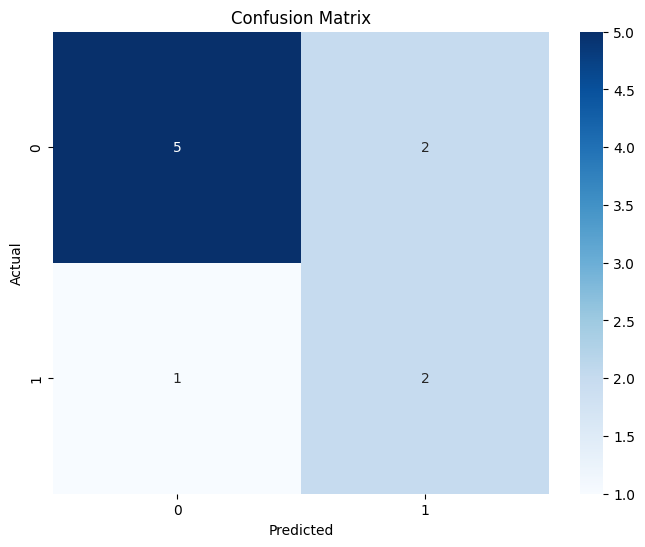

Validation Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.50      0.67      0.57         3

    accuracy                           0.70        10
   macro avg       0.67      0.69      0.67        10
weighted avg       0.73      0.70      0.71        10


Cross-validation Scores: [1.         0.81818182 0.9        0.8        0.7       ]
Average CV Score: 0.84 (+/- 0.20)


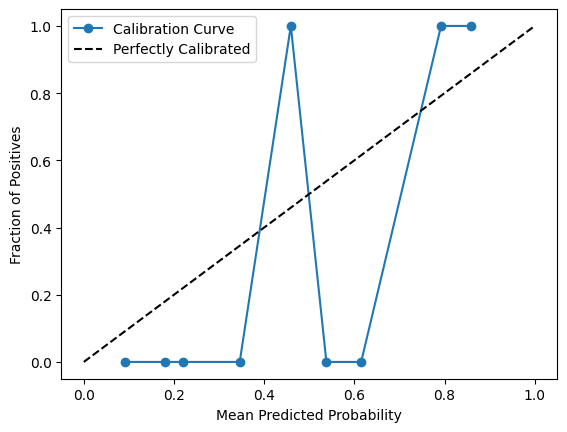


Making prediction for a test file...

Prediction Results for 301_AUDIO.wav:
Predicted Class: Non-depression
Confidence: 0.91

Probabilities:
Non-depression: 0.91
Depression: 0.09


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import os

class DepressionModelEvaluator:
    def __init__(self, feature_extractor):
        self.feature_extractor = feature_extractor
        self.model = RandomForestClassifier(
            n_estimators=100, random_state=42, class_weight='balanced'
        )

    def prepare_data(self, audio_dir, labels_file):
        """Prepare features and labels for model training"""
        labels_df = pd.read_csv(labels_file)
        features = []
        files = []

        for file in labels_df['file']:
            audio_path = os.path.join(audio_dir, file)
            feature_vector = self.feature_extractor.extract_features(audio_path)
            if feature_vector is not None:
                features.append(feature_vector)
                files.append(file)

        X = np.array(features)
        y = labels_df[labels_df['file'].isin(files)]['label'].values
        return X, y, files

    def balance_data(self, X, y):
        """Balance the dataset using SMOTE with adjusted k_neighbors"""
        from collections import Counter

        # Get the class distribution
        class_counts = Counter(y)
        minority_class_size = min(class_counts.values())

        # Set k_neighbors to the minimum between 5 and the minority class size minus 1
        k_neighbors = max(1, min(5, minority_class_size - 1))  # Ensure k_neighbors is at least 1

        # Use SMOTE only if there are at least 2 samples in the minority class
        if minority_class_size > 1:
            smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
            X_resampled, y_resampled = smote.fit_resample(X, y)
            print(f"Original dataset size: {len(y)}, Balanced dataset size: {len(y_resampled)}")
            return X_resampled, y_resampled
        else:
            print("Insufficient samples in minority class to apply SMOTE. Returning original dataset.")
            return X, y

    def evaluate_model(self, X, y):
        """Evaluate model using train-test split and cross-validation"""
        X_train, X_temp, y_train, y_temp = train_test_split(
            X, y, test_size=0.4, random_state=42
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=0.5, random_state=42
        )

        # Train model
        self.model.fit(X_train, y_train)

        # Validation predictions
        y_pred_val = self.model.predict(X_val)

        # Metrics
        accuracy = accuracy_score(y_val, y_pred_val)
        class_report = classification_report(y_val, y_pred_val)
        conf_matrix = confusion_matrix(y_val, y_pred_val)

        # Cross-validation
        cv_scores = cross_val_score(self.model, X, y, cv=5)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Print results
        print(f"Validation Accuracy: {accuracy:.2f}")
        print("\nClassification Report:")
        print(class_report)
        print("\nCross-validation Scores:", cv_scores)
        print(f"Average CV Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

        # Model calibration
        calibrated_model = CalibratedClassifierCV(self.model, method='sigmoid', cv='prefit')
        calibrated_model.fit(X_train, y_train)
        y_probs = calibrated_model.predict_proba(X_val)

        # Calibration curve
        prob_true, prob_pred = calibration_curve(y_val, y_probs[:, 1], n_bins=10)
        plt.plot(prob_pred, prob_true, marker='o', label='Calibration Curve')
        plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
        plt.xlabel('Mean Predicted Probability')
        plt.ylabel('Fraction of Positives')
        plt.legend()
        plt.show()

        return self.model

    def make_prediction(self, audio_file):
        """Make prediction for a single audio file"""
        features = self.feature_extractor.extract_features(audio_file)
        if features is None:
            return None

        features = features.reshape(1, -1)
        prediction = self.model.predict(features)
        probabilities = self.model.predict_proba(features)

        return {
            'prediction': prediction[0],
            'probability': max(probabilities[0]),
            'probabilities': {
                'non_depression': probabilities[0][0],
                'depression': probabilities[0][1]
            }
        }

# Example usage
def main():
    AUDIO_DIR = "/content/drive/MyDrive/datasset/audio"
    LABELS_FILE = os.path.join(AUDIO_DIR, "label_53.csv")

    # Initialize components
    feature_extractor = FeatureExtractor()  # Replace with your implementation
    evaluator = DepressionModelEvaluator(feature_extractor)

    # Prepare and balance data
    print("Preparing and balancing data...")
    X, y, files = evaluator.prepare_data(AUDIO_DIR, LABELS_FILE)
    X_balanced, y_balanced = evaluator.balance_data(X, y)

    # Evaluate model
    print("\nEvaluating model...")
    model = evaluator.evaluate_model(X_balanced, y_balanced)

    # Example prediction for a new file
    print("\nMaking prediction for a test file...")
    test_file = os.path.join(AUDIO_DIR, files[0])  # Using first file as example
    result = evaluator.make_prediction(test_file)

    if result:
        print(f"\nPrediction Results for {os.path.basename(test_file)}:")
        print(f"Predicted Class: {'Depression' if result['prediction'] == 1 else 'Non-depression'}")
        print(f"Confidence: {result['probability']:.2f}")
        print("\nProbabilities:")
        print(f"Non-depression: {result['probabilities']['non_depression']:.2f}")
        print(f"Depression: {result['probabilities']['depression']:.2f}")

if __name__ == "__main__":
    main()



# **15**

Preparing data...

Evaluating model...


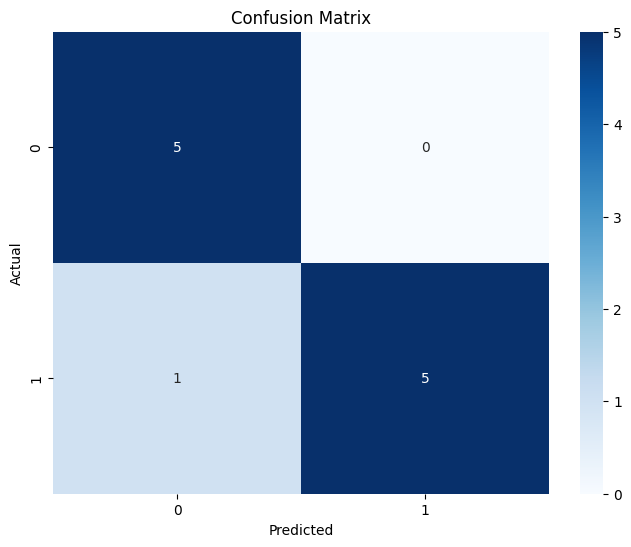

Test Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.83      0.91         6

    accuracy                           0.91        11
   macro avg       0.92      0.92      0.91        11
weighted avg       0.92      0.91      0.91        11


Cross-validation Scores: [0.81818182 0.90909091 0.9        0.8        0.7       ]
Average CV Score: 0.83 (+/- 0.15)

Making prediction for a test file...

Prediction Results for 301_AUDIO.wav:
Predicted Class: Non-depression
Confidence: 0.95

Probabilities:
Non-depression: 0.95
Depression: 0.05


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

class DepressionModelEvaluator:
    def __init__(self, feature_extractor):
        self.feature_extractor = feature_extractor
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)

    def prepare_data(self, audio_dir, labels_file):
        """Prepare features and labels for model training"""
        # Load labels
        labels_df = pd.read_csv(labels_file)

        # Extract features for all files
        features = []
        files = []

        for file in labels_df['file']:
            audio_path = os.path.join(audio_dir, file)
            feature_vector = self.feature_extractor.extract_features(audio_path)
            if feature_vector is not None:
                features.append(feature_vector)
                files.append(file)

        # Create feature array and labels
        X = np.array(features)
        y = labels_df[labels_df['file'].isin(files)]['label'].values

        return X, y, files

    def evaluate_model(self, X, y):
        """Evaluate model using train-test split and cross-validation"""
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )

        # Train model
        self.model.fit(X_train, y_train)

        # Make predictions
        y_pred = self.model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Cross-validation
        cv_scores = cross_val_score(self.model, X, y, cv=5)

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Print results
        print(f"Test Accuracy: {accuracy:.2f}")
        print("\nClassification Report:")
        print(class_report)
        print("\nCross-validation Scores:", cv_scores)
        print(f"Average CV Score: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")

        return self.model

    def make_prediction(self, audio_file):
        """Make prediction for a single audio file"""
        # Extract features
        features = self.feature_extractor.extract_features(audio_file)
        if features is None:
            return None

        # Reshape for single sample prediction
        features = features.reshape(1, -1)

        # Make prediction
        prediction = self.model.predict(features)
        probabilities = self.model.predict_proba(features)

        return {
            'prediction': prediction[0],
            'probability': max(probabilities[0]),
            'probabilities': {
                'non_depression': probabilities[0][0],
                'depression': probabilities[0][1]
            }
        }

# Example usage
def main():
    # Paths
    AUDIO_DIR = "/content/drive/MyDrive/datasset/audio"
    LABELS_FILE = os.path.join(AUDIO_DIR, "label_53.csv")

    # Initialize components
    feature_extractor = FeatureExtractor()
    evaluator = DepressionModelEvaluator(feature_extractor)

    # Prepare data
    print("Preparing data...")
    X, y, files = evaluator.prepare_data(AUDIO_DIR, LABELS_FILE)

    # Evaluate model
    print("\nEvaluating model...")
    model = evaluator.evaluate_model(X, y)

    # Example prediction for a new file
    print("\nMaking prediction for a test file...")
    test_file = os.path.join(AUDIO_DIR, files[0])  # Using first file as example
    result = evaluator.make_prediction(test_file)

    if result:
        print(f"\nPrediction Results for {os.path.basename(test_file)}:")
        print(f"Predicted Class: {'Depression' if result['prediction'] == 1 else 'Non-depression'}")
        print(f"Confidence: {result['probability']:.2f}")
        print("\nProbabilities:")
        print(f"Non-depression: {result['probabilities']['non_depression']:.2f}")
        print(f"Depression: {result['probabilities']['depression']:.2f}")

if __name__ == "__main__":
    main()